In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import polars as pl

<Axes: >

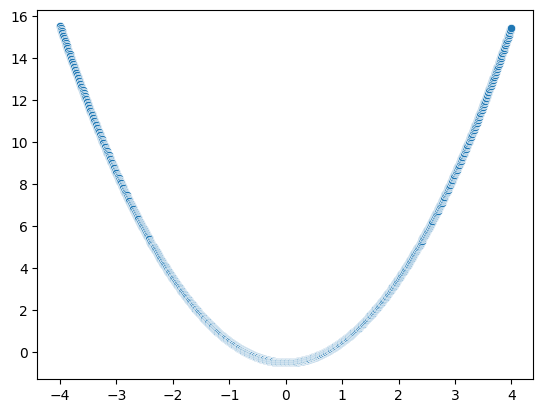

In [2]:
x = np.arange(-4, 4, 0.01)
y = x ** 2 - 0.5

sns.scatterplot(x=x, y=y)

<Axes: >

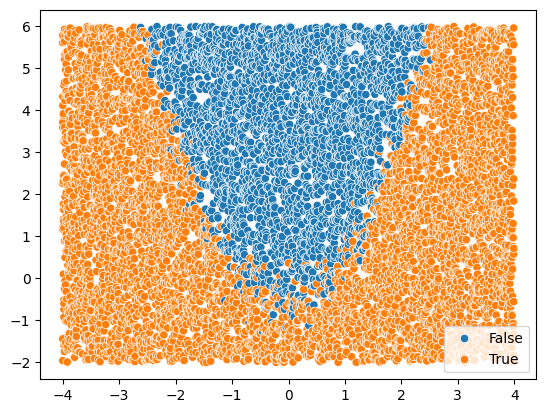

In [3]:
xr = np.repeat(x, 10)
yr = np.repeat(y, 10)
y_rng = np.random.uniform(-2, 6, len(yr))
rng_noise = np.random.normal(0, 0.5, len(yr))
labels = y_rng + rng_noise < yr
yyr = yr + y_rng

sns.scatterplot(x=xr, y=y_rng, hue=labels)

<Axes: xlabel='x', ylabel='y'>

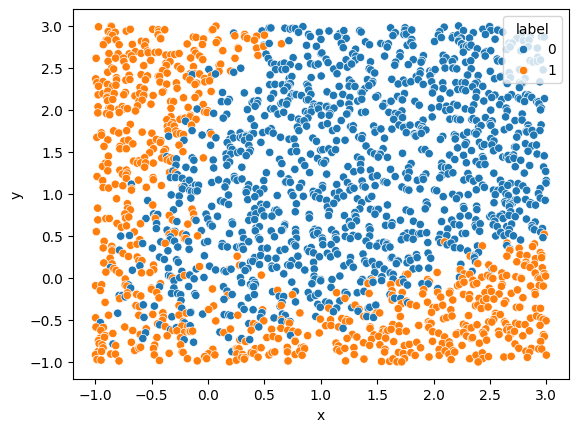

In [4]:
FI = -np.pi / 4
xx = np.cos(FI) * xr - np.sin(FI) * y_rng
yy = np.sin(FI) * xr + np.cos(FI) * y_rng

df = pl.DataFrame({
    'x': xx,
    'y': yy,
    'label': labels,
}).filter(
    (pl.col('x') > -1) &
    (pl.col('x') < 3) &
    (pl.col('y') < 3) &
    (pl.col('y') > -1)
).with_columns(
    pl.col('label').cast(pl.Int64)
)
sns.scatterplot(df.to_pandas(), x='x', y='y', hue='label')

In [5]:
df.write_csv('foo.csv')